<a href="https://colab.research.google.com/github/RutulPatel007/VR_Project1_Rutul_Patel_IMT2022021/blob/main/PartA%26B/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opencv-python numpy scikit-learn tensorflow keras matplotlib

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras import layers, models

In [ ]:
# Paths
data_dir = "drive/MyDrive/MP_VR"  # Change to your dataset path
categories = ["with_mask", "without_mask"]


In [ ]:
# Function to extract HOG features
def extract_hog_features(image):
    image = cv2.resize(image, (64, 128))  # Resize for HOG compatibility
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hog = cv2.HOGDescriptor()
    return hog.compute(gray).flatten()


In [ ]:
# Load dataset and extract handcrafted features
data, labels = [], []
for category in categories:
    path = os.path.join(data_dir, category)
    label = 0 if category == "without_mask" else 1
    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (64, 64))
        features = extract_hog_features(img)
        data.append(features)
        labels.append(label)


In [ ]:
# Convert to numpy arrays
data, labels = np.array(data), np.array(labels)


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Train SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_preds))


SVM Accuracy: 0.8867235079171741


In [ ]:
# Train Neural Network classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
mlp.fit(X_train, y_train)
mlp_preds = mlp.predict(X_test)
print("MLP Accuracy:", accuracy_score(y_test, mlp_preds))


MLP Accuracy: 0.9269183922046285


# CNN

In [ ]:
# CNN Model
def create_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
# Load dataset for CNN
cnn_data, cnn_labels = [], []
for category in categories:
    path = os.path.join(data_dir, category)
    label = 0 if category == "without_mask" else 1
    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (64, 64))
        cnn_data.append(img)
        cnn_labels.append(label)


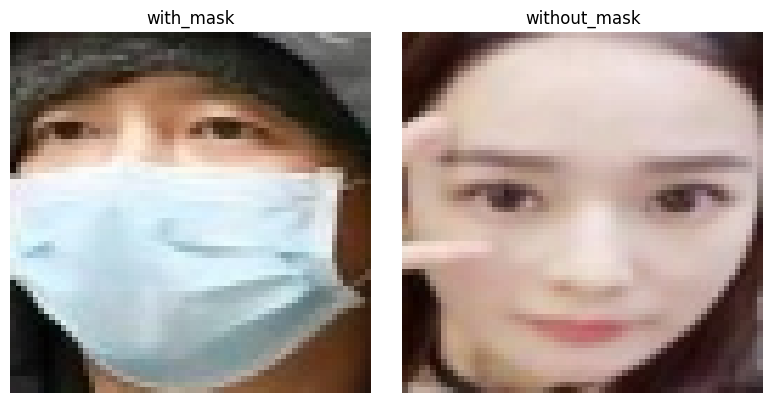

In [ ]:
# Dictionary to store one sample per class
sample_images = {}

for category in categories:
    path = os.path.join(data_dir, category)
    label = 0 if category == "without_mask" else 1
    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display
        img = cv2.resize(img, (64, 64))
        sample_images[category] = img
        break  # Take only the first image from each class

# Plot the images side by side
plt.figure(figsize=(8, 4))

for i, category in enumerate(categories):
    plt.subplot(1, 2, i + 1)
    plt.imshow(sample_images[category])
    plt.title(category)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
cnn_data, cnn_labels = np.array(cnn_data) / 255.0, np.array(cnn_labels)
X_train, X_test, y_train, y_test = train_test_split(cnn_data, cnn_labels, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

In [ ]:
cnn = create_cnn()
cnn.fit(datagen.flow(X_train, y_train, batch_size=32),
        epochs=50,
        validation_data=(X_test, y_test))

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


103/103 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.7671 - loss: 0.5155 - val_accuracy: 0.9160 - val_loss: 0.2404
Epoch 2/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.9024 - loss: 0.2652 - val_accuracy: 0.9245 - val_loss: 0.2075
Epoch 3/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.9149 - loss: 0.2285 - val_accuracy: 0.9330 - val_loss: 0.1853
Epoch 4/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.9131 - loss: 0.2404 - val_accuracy: 0.9440 - val_loss: 0.1531
Epoch 5/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.9285 - loss: 0.1946 - val_accuracy: 0.9476 - val_loss: 0.1452
Epoch 6/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.9294 - loss: 0.1954 - val_accuracy: 0.9476 - val_loss: 0.1365
Epoch 7/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.9242 - loss: 0.1894 - val_accuracy: 0.9440 - val_loss: 0.1439
Epoch 8/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.9305 - loss: 0.1735 - val_accuracy: 0.95

In [ ]:
# Evaluate CNN
cnn_acc = cnn.evaluate(X_test, y_test)[1]
print("CNN Accuracy:", cnn_acc)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9767 - loss: 0.0996
CNN Accuracy: 0.971985399723053


In [ ]:
cnn.save("drive/MyDrive/MP_VR/face_mask_cnn_model.h5")
cnn.save("drive/MyDrive/MP_VR/face_mask_cnn_model.keras")


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Enter the path to the image file: drive/MyDrive/MP_VR/without_mask/0_0_aidai_0029.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


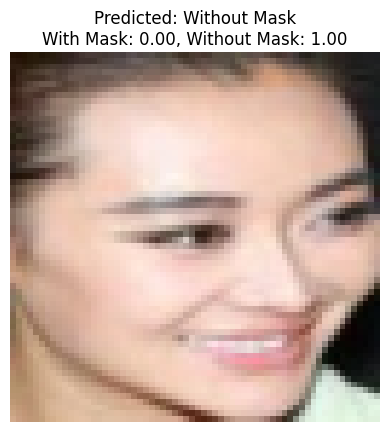

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the trained model (.keras)
model = load_model("drive/MyDrive/MP_VR/face_mask_cnn_model.keras")
# model=cnn
# Take input file from user
file_path = input("Enter the path to the image file: ")

# Load and preprocess the image
img = cv2.imread(file_path)
if img is None:
    print("Failed to load image. Please check the file path.")
else:
    img_resized = cv2.resize(img, (64, 64))
    img_normalized = img_resized / 255.0
    img_input = np.expand_dims(img_normalized, axis=0)  # Shape: (1, 64, 64, 3)

    # Predict probabilities
    prob = model.predict(img_input)[0][0]
    prob_with_mask = prob
    prob_without_mask = 1 - prob

    # Determine predicted label
    pred_label = "With Mask" if prob > 0.5 else "Without Mask"

    # Display image and prediction
    plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Predicted: {pred_label}\nWith Mask: {prob_with_mask:.2f}, Without Mask: {prob_without_mask:.2f}")
    plt.show()